In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import umap.umap_ as umap

In [2]:
energies = []
# Open the text file for reading
with open('energies_per_atom.txt', 'r') as file:
    # Read the contents of the file
    lines = file.readlines()[1:]

    # Iterate through each line
    for line in lines:
        # Split the line into words
        words = line.split()

        # Extract the last word, assuming it's a number
        last_number = float(words[-1])
        if words[0][-1] == 'z':
            print(words[0])
            continue

        # Do something with the last number
        energies.append(last_number)

# plt.plot(energies)
print(len(energies))
labels = np.array(energies[:-10])

# Reshape the array into subarrays of size 25
subarrays = labels.reshape(-1, 25)

# Print the shape of the resulting subarrays
print(subarrays.shape)
equil_labels = subarrays[:,-13:]
print(equil_labels.shape)
# Stack the array into a one-dimensional array
equil_labels = equil_labels.reshape(-1)
print(equil_labels.shape)

training_data_#0000.xyz
training_data_#0050.xyz
training_data_#0055.xyz
training_data_#0060.xyz
training_data_#0075.xyz
training_data_#0080.xyz
training_data_#0110.xyz
310
(12, 25)
(12, 13)
(156,)


In [3]:
with open("2b_all_pd", 'rb') as pickle_file:
    pd_2b = pickle.load(pickle_file)

with open("3b_all_pd", 'rb') as pickle_file:
    pd_3b = pickle.load(pickle_file)

with open("4b_all_pd", 'rb') as pickle_file:
    pd_4b = pickle.load(pickle_file)

# print(np.shape(pd_2b))
# print(np.shape(pd_3b))
# print(np.shape(pd_4b))

# Stack the arrays along the third axis
stacked_array = np.concatenate((pd_2b, pd_3b, pd_4b), axis=2)
print(np.shape(stacked_array))

equil_array = stacked_array[:,-13:,:]
equil_array = equil_array.reshape(-1,stacked_array.shape[2])
equil_array = np.nan_to_num(equil_array, nan=0)
print(np.shape(equil_array))

full_array = stacked_array.reshape(-1,stacked_array.shape[2])
full_array = np.nan_to_num(full_array, nan=0)
print(np.shape(full_array))

(12, 25, 180)
(156, 180)
(300, 180)


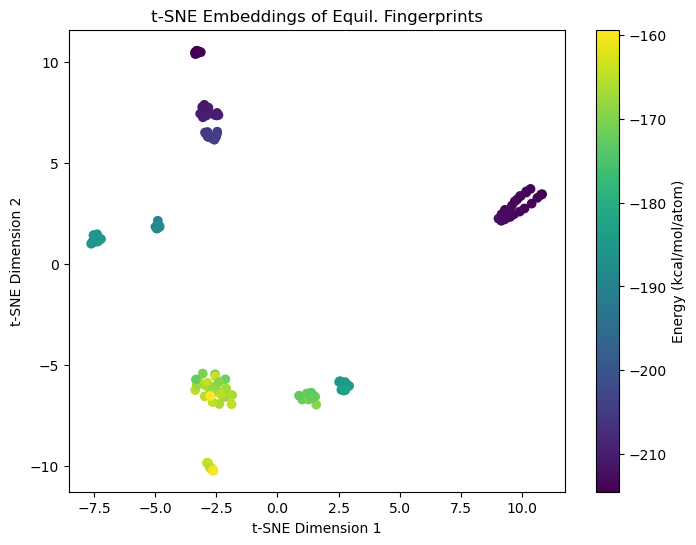

R-squared: 0.9593851354114955


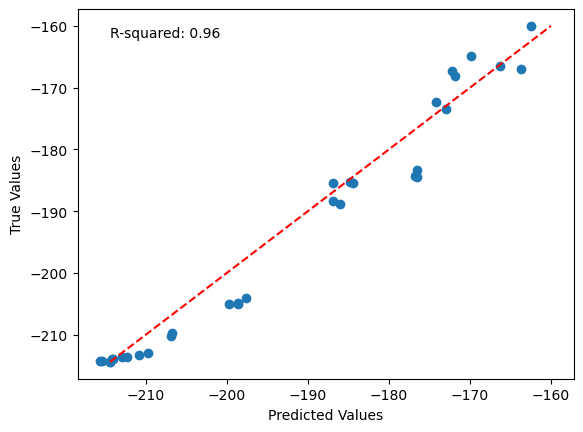

In [7]:
X = equil_array
y = equil_labels

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.svm import SVR
from sklearn import svm
from sklearn.svm import SVC

# Assuming you have input data X (array of rows) and labels y

# Convert array X to a DataFrame
df = pd.DataFrame(X)

# Add y as a labels column
df['labels'] = y

# Extract features (X) by dropping the labels column
X_features = df.drop(columns=['labels'])

# Initialize and fit the t-SNE model
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_features)

# Plot the t-SNE embeddings colored by the labels column
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df['labels'], cmap='viridis')
plt.colorbar(label='Energy (kcal/mol/atom)')
plt.title('t-SNE Embeddings of Equil. Fingerprints')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_features, df['labels'], test_size=0.2, random_state=42)

model = svm.SVR(kernel='poly')

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Plot the results
plt.scatter(y_pred, y_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
# Add R-squared value to the plot
plt.text(min(y_test), max(y_test), f'R-squared: {r2:.2f}', verticalalignment='top', horizontalalignment='left')
plt.show()
